# Model Knn-Neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leemos el csv con las geometrias y distancia al punto contaminante

In [2]:
df_modelling = pd.read_csv('../data/csv/model_csv/df_model_geom.csv', sep=';', encoding= 'utf-8',  compression='gzip', index_col=False)

In [3]:
df_modelling.shape

(85526, 29)

In [4]:
df_modelling.drop(['Unnamed: 0'], axis=1, inplace=True) #Borramos columnas innecesarias

In [5]:
pd.options.display.max_columns = None

In [6]:
df_modelling.sample(5100)

,Id,ProvinciaReside,MunicipioReside,Sexo,AnioCumplidos,TamanioMuniResi,CausaMortaReduc,NivelEstudios,Poblacion,Provincia,Comunidad,Latitud,Longitud,Habitantes,Hombres,Mujeres,CodigoPRTR,LongitudE,LatitudE,Contaminante,total_anios_Expo_Id,Total_Kg_expo,COD_3,Descripcion_Cod_3,target,geometry_death,geometry_focalEmission,Distance
56163,571942,33,24,6,98,5,23,3,Gijón,Asturias,Asturias,43.54526,-5.661926,277554,131594,145960,1915,-5.718301,43.564759,Partículas (PM10),6,4.745047e+06,C50,TUMOR_MALIGNO_DE_LA_MAMA,0,POINT (-5.661925999999999 43.54526),POINT (-5.718300599999999 43.5647589),5045
58787,709647,39,75,6,86,6,58,4,Santander,Cantabria,Cantabria,43.46096,-3.807934,182700,84984,97716,214,-3.842748,43.440389,Partículas (PM10),2,6.439000e+05,I26,EMBOLIA_PULMONAR,0,POINT (-3.807934 43.46095999999999),POINT (-3.8427478 43.44038920000001),3626
25323,1001507,8,101,1,89,5,64,2,Hospitalet de Llobregat (L'),Barcelona,Catalunya,41.35958,2.099704,257038,126459,130579,8153,2.157409,41.335970,Dióxido de carbono (CO2),2,1.655578e+09,J44,OTRAS_ENFERMEDADES_PULMONARES_OBSTRUCTIVAS_CRO...,0,POINT (2.099703999999997 41.35957999999999),POINT (2.1574094 41.33597020000001),5505
4159,1078585,8,19,1,82,6,64,3,Barcelona,Barcelona,Catalunya,41.38792,2.169919,1621537,771570,849967,5717,2.217493,41.424009,Dióxido de carbono (CO2),5,3.901070e+09,J44,OTRAS_ENFERMEDADES_PULMONARES_OBSTRUCTIVAS_CRO...,0,POINT (2.169919000000001 41.38792),POINT (2.2174926 41.4240094),5657
9966,102326,15,30,1,65,6,28,4,Coruña (A),A Coruña,Galicia,43.37087,-8.395835,246056,114498,131558,6026,-8.451023,43.344621,Dióxido de carbono (CO2),4,2.249000e+09,C61,TUMOR_MALIGNO_DE_LA_PROSTATA,0,POINT (-8.395835 43.37087),POINT (-8.4510231 43.34462120000001),5350
73784,80766,14,21,6,48,6,15,4,Córdoba,Córdoba,Andalucía,37.88473,-4.779152,328428,158233,170195,731,-4.779383,37.888175,Partículas (PM10),1,2.108000e+05,C25,TUMOR_MALIGNO_DEL_PANCREAS,0,POINT (-4.779151999999999 37.88473),POINT (-4.7793835 37.8881751),382
51423,1122303,8,245,1,77,5,31,3,Santa Coloma de Gramenet,Barcelona,Catalunya,41.45107,2.208978,119717,60889,58828,4892,2.173313,41.385048,Partículas (PM10),6,1.696836e+06,C67,TUMOR_MALIGNO_DE_LA_VEJIGA_URINARIA,0,POINT (2.208978000000001 41.45107000000001),POINT (2.1733131 41.3850477),7930
37455,712231,39,87,6,60,4,24,3,Torrelavega,Cantabria,Cantabria,43.35146,-4.047017,55947,26887,29060,3182,-4.043252,43.374491,Dióxido de carbono (CO2),1,9.140000e+08,C53,TUMOR_MALIGNO_DEL_CUELLO_DEL_UTERO,0,POINT (-4.047016999999999 43.35145999999999),POINT (-4.043251600000001 43.3744914),2576
53537,740628,41,4,6,83,4,27,2,Alcalá de Guadaíra,Sevilla,Andalucía,37.33833,-5.844032,70155,34956,35199,1757,-5.865654,37.359226,Partículas (PM10),3,1.289500e+06,C51,TUMOR_MALIGNO_DE_LA_VULVA,0,POINT (-5.844031999999999 37.33833),POINT (-5.865653500000001 37.3592264),3009
82205,108735,15,35,1,49,2,18,4,Fene,A Coruña,Galicia,43.47521,-8.165961,14165,6830,7335,784,-8.204783,43.495666,Partículas (PM10),1,5.610000e+04,C34,TUMOR_MALIGNO_DE_LOS_BRONQUIOS_Y_DEL_PULMON,1,POINT (-8.165960999999999 43.47521),POINT (-8.2047832 43.4956661),3883


In [7]:
df_modelling.describe()

,Id,ProvinciaReside,MunicipioReside,Sexo,AnioCumplidos,TamanioMuniResi,CausaMortaReduc,NivelEstudios,Latitud,Longitud,Habitantes,Hombres,Mujeres,CodigoPRTR,LongitudE,LatitudE,total_anios_Expo_Id,Total_Kg_expo,target,Distance
count,8.552600e+04,85526.000000,85526.000000,85526.000000,85526.000000,85526.000000,85526.000000,85526.000000,85526.000000,85526.000000,8.552600e+04,85526.000000,85526.000000,85526.000000,85526.000000,85526.000000,85526.000000,8.552600e+04,85526.000000,85526.000000
mean,6.832887e+05,24.102156,85.152784,3.055106,75.289818,4.931951,32.592942,5.742909,40.327955,-2.491245,3.915583e+05,187985.258974,203573.081426,3368.664219,-2.490242,40.327924,2.780862,9.093853e+08,0.161588,3740.915523
std,3.727670e+05,15.717473,105.763513,2.460110,13.563996,1.328930,22.166800,12.446900,3.514643,4.592454,5.001371e+05,237976.591683,262189.200077,2132.720507,4.595470,3.512169,1.792664,1.738742e+09,0.368075,2456.168412
min,5.000000e+00,1.000000,1.000000,1.000000,0.000000,2.000000,6.000000,1.000000,28.124820,-16.314780,1.020000e+02,54.000000,48.000000,11.000000,-16.261808,28.144978,1.000000,5.033000e+04,0.000000,17.000000
25%,2.994660e+05,8.000000,20.000000,1.000000,67.000000,4.000000,15.000000,3.000000,39.470240,-4.779152,7.015500e+04,34876.000000,35199.000000,1593.000000,-4.779383,39.469907,1.000000,5.472680e+05,0.000000,1334.000000
50%,7.872880e+05,20.000000,40.000000,1.000000,78.000000,6.000000,23.000000,4.000000,41.387920,-1.984421,2.075320e+05,102781.000000,105895.000000,3469.000000,-1.969660,41.388362,2.000000,3.452836e+06,0.000000,3875.000000
75%,1.013214e+06,38.000000,101.000000,6.000000,85.000000,6.000000,58.000000,5.000000,42.817210,2.045171,3.818470e+05,186191.000000,195656.000000,4892.000000,2.040820,42.812227,4.000000,9.396260e+08,0.000000,5657.000000
max,1.166867e+06,52.000000,911.000000,6.000000,108.000000,6.000000,93.000000,99.000000,43.609970,4.264211,1.621537e+06,771570.000000,849967.000000,8702.000000,4.264603,43.582673,8.000000,9.300000e+09,1.000000,9499.000000


Vamos a normalizar ciertas variables que consideramos importantes para el modelo para poder tratarlas luego

In [8]:
df_model_fil = df_modelling[['target','Sexo', 'AnioCumplidos', 'TamanioMuniResi', 'total_anios_Expo_Id', 'Contaminante','Total_Kg_expo','Distance']]
df_model_fil_with_geom = df_modelling[['target','Sexo', 'AnioCumplidos', 'TamanioMuniResi', 'total_anios_Expo_Id', 'Contaminante','Total_Kg_expo','Distance','geometry_death','Latitud','Longitud','Habitantes','LatitudE','LongitudE']]


Comprobamos las variables tipo object

In [9]:
obj_df = df_model_fil.select_dtypes(include=['object']).copy()
obj_df.head()

,Contaminante
0,Dióxido de carbono (CO2)
1,Dióxido de carbono (CO2)
2,Dióxido de carbono (CO2)
3,Dióxido de carbono (CO2)
4,Dióxido de carbono (CO2)


Comprobamos nulos

In [10]:
obj_df[obj_df.isnull().any(axis=1)]

,Contaminante


### Pre-Processing: Encoding Categorical Values

Optamos por este tipo de codificación para no asignar pesos específicos por cada valor

In [11]:
df_model_fil= pd.get_dummies(df_model_fil, columns=["Contaminante"], prefix=["Cont"])
df_model_fil_with_geom= pd.get_dummies(df_model_fil_with_geom, columns=["Contaminante"], prefix=["Cont"]) #Para utilizar en el modelo espacial

In [12]:
df_model_fil.head()

,target,Sexo,AnioCumplidos,TamanioMuniResi,total_anios_Expo_Id,Total_Kg_expo,Distance,Cont_Dióxido de carbono (CO2),Cont_Partículas (PM10)
0,1,1,62,4,5,7.319000e+09,4040,1,0
1,0,6,81,4,5,7.319000e+09,4040,1,0
2,0,6,69,4,5,7.319000e+09,4040,1,0
3,0,6,49,4,5,7.319000e+09,4040,1,0
4,0,6,90,4,5,7.319000e+09,4040,1,0


In [13]:
df_model_fil['Sexo'].dtype

dtype('int64')

In [14]:
df_model_fil['Sexo']= df_model_fil['Sexo'].replace(6,0)
df_model_fil_with_geom['Sexo']= df_model_fil_with_geom['Sexo'].replace(6,0) #Para utilizar en el modelo espacial

In [15]:
df_model_fil['AnioCumplidos'].describe()

count    85526.000000
mean        75.289818
std         13.563996
min          0.000000
25%         67.000000
50%         78.000000
75%         85.000000
max        108.000000
Name: AnioCumplidos, dtype: float64

In [16]:
df_model_fil.head()

,target,Sexo,AnioCumplidos,TamanioMuniResi,total_anios_Expo_Id,Total_Kg_expo,Distance,Cont_Dióxido de carbono (CO2),Cont_Partículas (PM10)
0,1,1,62,4,5,7.319000e+09,4040,1,0
1,0,0,81,4,5,7.319000e+09,4040,1,0
2,0,0,69,4,5,7.319000e+09,4040,1,0
3,0,0,49,4,5,7.319000e+09,4040,1,0
4,0,0,90,4,5,7.319000e+09,4040,1,0


Observamos rangos de dos de las variables numéricas que escalaremos más adelante

In [17]:
df_model_fil[['Total_Kg_expo','total_anios_Expo_Id']].describe()

,Total_Kg_expo,total_anios_Expo_Id
count,8.552600e+04,85526.000000
mean,9.093853e+08,2.780862
std,1.738742e+09,1.792664
min,5.033000e+04,1.000000
25%,5.472680e+05,1.000000
50%,3.452836e+06,2.000000
75%,9.396260e+08,4.000000
max,9.300000e+09,8.000000


Salvamos a csv para disponer del dataframe en el siguiente modelo

In [18]:
df_model_fil.to_csv('../data/csv/model_csv/df_model_dist_encoding.csv', sep=';', encoding= 'utf-8',  compression='gzip')
df_model_fil_with_geom.to_csv('../data/csv/model_csv/df_model_geom_encoding.csv', sep=';', encoding= 'utf-8',  compression='gzip')

### Knn-Neightbors: approach 1

Hacemos una primera aproximación sin valores escalados sólo con los del dataframe filtrado del inicio

In [19]:
X = df_model_fil[['Sexo', 'AnioCumplidos', 'TamanioMuniResi', 'total_anios_Expo_Id', 'Total_Kg_expo', 'Distance']].values
y = df_model_fil["target"]

In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

Entrenamos el primer modelo muy sencillo

In [21]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

NOTA*** Codificación INE para tamaño municipios:
1:	Municipio menor o igual a 10.000 habitantes
2:	 De 10.001 a 20.000
3:	 De 20.001 a 50.000
4:	 De 50.001 a 100.000
5:	 Mayor de 100.000
6:	 capital de provincia

Hacemos unas primeras predicciones, ejemplo para un varón de 80 años de capital de provincia con 2 años de exposición al contaminante (300 Kg acumulados) y que vive a una distancia de 1000 metros del foco contaminante. No se tiene en cuenta el tipo de contaminante.

In [22]:
clf.predict([[1,80,6,2,300,1000]])

array([0], dtype=int64)

Se observa en una primera aproximación que la edad es un factor de riesgo de fallecimiento por cancer de pulmón (target), pero no sólo en edades avanzadas sino en edades muy tempranas, aunque quizá sea un factor de confusión en el estudio. Igualmente parece ser que la distancia al foco contaminante es muy influyente.

#### Setting Training and Test Sets

A continuación vamos a dividir del dataframe en dos datasets, uno de entrenamiento y otro de test, conforme a las variables iniciales X,y (variables sin escalar)

In [23]:
from sklearn.model_selection import train_test_split
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
#Dimensión del input para el Train
print (X_train.shape)

(57302, 6)


In [25]:
#Dimensión del input para el test
print (y_train.shape)

(57302,)


Establecemos el número de neighors y lo pasamos al clasificador

In [26]:
clf = KNeighborsClassifier(n_neighbors=2)

Entrenamos con el input Train y el output train

In [27]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

Hacemos predicción con el Input del dataset Test

In [28]:
prediccion_test = clf.predict(X_test)
prediccion_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Calculamos la matriz de confusión

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediccion_test)
print (cm)

[[22858   818]
 [ 4285   263]]


Ploteamos la matriz

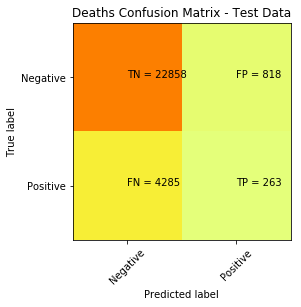

In [30]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Deaths Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Accuray score

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test),y_test)

0.8191964285714286

Realizamos el cross Validation Score

In [32]:
# Crossval score
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,cv=10,scoring="accuracy")

array([0.8315211 , 0.76850228, 0.83222261, 0.81807553, 0.81106045,
       0.82006314, 0.81735267, 0.7717493 , 0.79256314, 0.82916277])

Calculamos el accuracy medio para nuestro modelo

In [33]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring="accuracy"))

0.809227298350012

Vamos a utilizar la librria GridSearchCV de sklearn

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
clf_good = GridSearchCV(KNeighborsClassifier(),param_grid={"n_neighbors":range(1,30)},scoring="accuracy")

Entrenamos de nuevo el modelo, buscando el mejor clasificador (Nota** el proceso consume tiempo y recursos)

In [36]:
clf_good.fit(X_train,y_train)
print(clf_good.best_params_)

{'n_neighbors': 28}


In [37]:
#np.mean(cross_val_score(clf_good,X,y,cv=10,scoring="accuracy"))

In [38]:
#accuracy_score(clf_good.predict(X_test),y_test)

### Knn-Neightbors: approach 2

In [39]:
df_model_fil.columns

Index(['target', 'Sexo', 'AnioCumplidos', 'TamanioMuniResi',
       'total_anios_Expo_Id', 'Total_Kg_expo', 'Distance',
       'Cont_Dióxido de carbono (CO2)', 'Cont_Partículas (PM10)'],
      dtype='object')

### Pre-processing: Feature Scaling 

Procedemos a estandarizar variables numéricas, para ello utilizamos dos métodos diferentes, para comparar resultados

#### Standardization Vs Min-Max scaling

In [40]:
from sklearn import preprocessing

#Columns of interest for preprocessing
columnas = ['AnioCumplidos', 'TamanioMuniResi', 'total_anios_Expo_Id', 'Total_Kg_expo','Distance']

#Estandarización sólo para ejemplo de comparación
std_scale  = preprocessing.StandardScaler().fit(df_model_fil) 
df_std = std_scale.transform(df_model_fil) #Solo para utilizar el array en la prueba siguiente.

#MinMax scale sólo para ejemplo de comparación
minmax_scale = preprocessing.MinMaxScaler().fit(df_model_fil)
df_minmax = minmax_scale.transform(df_model_fil)

#Escalamos las columnas de interes.
df_model_fil[columnas] = preprocessing.StandardScaler().fit_transform(df_model_fil[columnas]) #Solo columnas de interés escaladas
df_model_std = df_model_fil #asignamos para cambiar nombre

In [41]:
df_model_std.head()

,target,Sexo,AnioCumplidos,TamanioMuniResi,total_anios_Expo_Id,Total_Kg_expo,Distance,Cont_Dióxido de carbono (CO2),Cont_Partículas (PM10)
0,1,1,-0.979792,-0.701283,1.237907,3.686373,0.121769,1,0
1,0,0,0.420983,-0.701283,1.237907,3.686373,0.121769,1,0
2,0,0,-0.463717,-0.701283,1.237907,3.686373,0.121769,1,0
3,0,0,-1.938217,-0.701283,1.237907,3.686373,0.121769,1,0
4,0,0,1.084508,-0.701283,1.237907,3.686373,0.121769,1,0


Calculamos el estadísico Z-score para cada valor, en relación a la media y la desviación estándar

In [42]:
from scipy import stats
df= np.array(df_std)
zscore_df = stats.zscore(df, axis=1)
#print (zscore_df)

Observamos los valores, para poder comparar

In [43]:
print('Mean after standardization:\nTotal_Kg_expo={:.2f},total_anios_Expo_Id={:.2f}'
      .format(df_std[:,4].mean(), df_std[:,2].mean()))
print('\nStandard deviation after standardization:\nTotal_Kg_expol={:.2f},total_anios_Expo_Id={:.2f}'
      .format(df_std[:,4].std(), df_std[:,3].std()))

Mean after standardization:
Total_Kg_expo=0.00,total_anios_Expo_Id=0.00

Standard deviation after standardization:
Total_Kg_expol=1.00,total_anios_Expo_Id=1.00


In [44]:
print('Min-value after min-max scaling:\nTotal_Kg_expo={:.2f}, total_anios_Expo_Id={:.2f}'
      .format(df_minmax[:,4].min(), df_minmax[:,3].min()))
print('\nMax-value after min-max scaling:\nTotal_Kg_expol={:.2f}, total_anios_Expo_Id={:.2f}'
      .format(df_minmax[:,4].max(), df_minmax[:,3].max()))

Min-value after min-max scaling:
Total_Kg_expo=0.00, total_anios_Expo_Id=0.00

Max-value after min-max scaling:
Total_Kg_expol=1.00, total_anios_Expo_Id=1.00


#### Vamos a aplicar el escalado estandar al dataframe completo dividiendo un set de entrenamiento y test

Volvemos a dividir el dataframe escalado

In [45]:
from sklearn.model_selection import train_test_split

X_ = df_model_std.values[:,1:] #Resto de columnas escaladas
y_ = df_model_std.values[:,0] #columna target

X_train, X_test, y_train, y_test = train_test_split(X_, y_,
    test_size=0.30, random_state=12345)

Obtenemos el clasificador, le pasamos 28 como knn ya que es el valor que obtuvimos anteriormente y despues de correr el modelo varias veces es el más óptimo

In [46]:
clf2 = KNeighborsClassifier(n_neighbors=28)

Entrenamos el modelo con el set estandarizado

In [47]:
clf2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=28, p=2,
           weights='uniform')

clf.fit(X_train,y_train)

Hacemos la predicción

In [48]:
prediccion_test2 = clf2.predict(X_test)
prediccion_test2

array([0., 0., 0., ..., 0., 0., 0.])

#### Calculamos de nuevo la matriz de Confusión

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediccion_test2)
print (cm)

[[21484    49]
 [ 4106    19]]


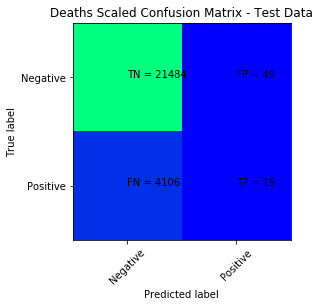

In [50]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['Negative','Positive']
plt.title('Deaths Scaled Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Calculamos el Accuracy score

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(clf2.predict(X_test),y_test)

0.838062202821732

Realizamos la validación cruzada del modelo

In [52]:
# Crossval score
from sklearn.model_selection import cross_val_score
cross_val_score(clf2,X,y,cv=10,scoring="accuracy")

array([0.83841927, 0.8328072 , 0.83830235, 0.83818543, 0.82555828,
       0.83269028, 0.83863424, 0.78893826, 0.79922825, 0.83816651])

Obtenemos la media de los valores anteriores

In [53]:
np.mean(cross_val_score(clf2,X,y,cv=10,scoring="accuracy"))

0.8270930079183809

En conclusión se puede decir que el escalado de nuestras variables numéricas ha mejorado nuestro "Accuracy" del modelo